# Project: Exercises on Hypothesis Testing

<br>

## Questions to address:
- First Study: check if weight loss was significant in a study using a control group
- Check whether the number of Males and Females in a subset of data is different than expected
- Same as before but with two categories: numbers and income
- Same as before but with gender and race (multiple categories)

<br>

## Tools:
- Mean Difference and Permutation test
- Chi-Square and Permutation test
- 2-category chi-square
  - scipy.stats.chisquare
- Multi-category chi-square test
  - pd.crosstab
  - scipy.stats.chi2_contingency: chi-square on multiple variables

<br>

### load defaults

In [1]:
import pandas as pd
import re
import numpy as np
import requests 

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams
import matplotlib.dates as mdates

from functions import *

plt.rcParams.update({'axes.titlepad': 20, 'font.size': 12, 'axes.titlesize':20})

colors = [(0/255,107/255,164/255), (255/255, 128/255, 14/255), 'red', 'green', '#9E80BA', '#8EDB8E', '#58517A']
Ncolors = 10
color_map = plt.cm.Blues_r(np.linspace(0.2, 0.5, Ncolors))
#color_map = plt.cm.tab20c_r(np.linspace(0.2, 0.5, Ncolors))

<br>

# First Study:

To determine if a weight loss pill was effective, we conducted a study with 100 volunteers, split randomly into 2 groups. One group was given a placebo, the other the pill. 

- Null hypothesis: participants who consumed the weight loss pills lost the same amount of weight as those who didn't take the pill.
- Alternative hypothesis: participants who consumed the weight loss pills lost more weight than those who didn't take the pill.

### Q1:  Compare the distribution of eight losses for the two groups

2.82
5.34


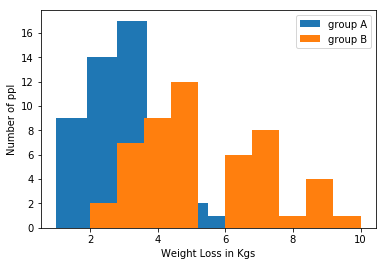

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

weight = pd.read_csv('./data/weight_loss.csv', header=None)

weight_lost_a = weight.iloc[:,0]
weight_lost_b = weight.iloc[:,1]

mean_group_a = np.mean(weight_lost_a)
print(mean_group_a)
mean_group_b = np.mean(weight_lost_b)
print(mean_group_b)
plt.hist(weight_lost_a, label="group A")
plt.hist(weight_lost_b, label="group B")
plt.xlabel("Weight Loss in Kgs"), plt.ylabel("Number of ppl")
plt.legend()
plt.show()

In [44]:
mean_difference = mean_group_b - mean_group_a
print(mean_difference)

2.52


- There is a difference in weight loss between the two groups. Is it signficant? 

<br>

### Q2: Permutation test to check if mean_difference is significant

The permutation test involves simulating rerunning the study many times and check the distribution of a test statistics over these many iterations. This sampling distribution approximates the full range of possible test statistics under the null hypothesis. We can then check how likely it is to observe our mean difference under the null hypothesis (in the sampling distribution). 

- To simulate rerunning the study under the null hipothesis, we keep re-randomizing the groups that the weight loss values belong to.

- Ideally, the number of times we re-randomize the groups that each data point belongs to matches the total number of possible permutations. 

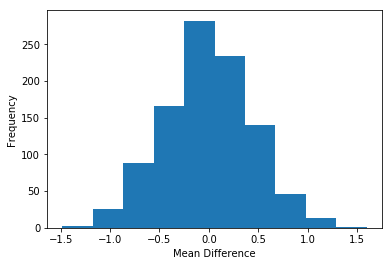

In [11]:
#assign random values to a or b, 1000 times, see the distribution of mean_b-mean_a

all_values = pd.concat([weight_lost_a,weight_lost_b])

mean_differences = []

for ii in range(1000):
    group_a = []
    group_b = []
    for element in all_values:
        if(np.random.rand(1)>=0.5):
            group_a.append(element)
        else:
            group_b.append(element)
    iteration_mean_difference = np.mean(group_b) - np.mean(group_a)
    mean_differences.append(iteration_mean_difference)
    
#print(mean_differences)    
plt.hist(mean_differences)
plt.xlabel("Mean Difference"), plt.ylabel("Frequency")
plt.show()

### Create a frequency table for how many times different value of the test statistic (mean difference) appear in the sampling distribution (same as previous plot)

In [8]:
sampling_distribution = {}

for element in mean_differences:
    if sampling_distribution.get(element, False):
        val = sampling_distribution.get(element)        
        sampling_distribution[element] = val + 1
    else:
        sampling_distribution[element] = 1
        
#print(sampling_distribution)

### p-value: how many times our mean difference appeared in the randomized sampling distribution

In [52]:
frequencies = []

for key, element in sampling_distribution.items():
    if(key>=2.52):
        frequencies.append(element)
        
p_value = np.sum(frequencies)/1000.
print(p_value)

0.0


- Since the p value is less than 5%, we conclude that the difference in weight lost can't be attributed to random chance alone. 

<br>
<br>
<br>

## Second Study

Looking at a subset of data from US income and demographics we see that of the 32561 rows, 10771 are Female and 21790 are Male. Since the full census has about 50-50, these numbers seem a bit off (should be 16280.5 each).

<br>

### Q1: Calculate Chi-Squared values between expected and observed numbers of Males and Females

In [55]:
obs_females = 10771
exp_females = 16280.5
female_diff = (obs_females - exp_females)**2/exp_females

obs_males = 21790
exp_males = 16280.5
male_diff = (obs_males - exp_males)**2/exp_males

gender_chisq = female_diff + male_diff
print(gender_chisq)

3728.950615767329


<br>

### Q2: Permuation Test

We can translate a chi-squared value into a statistical significance value using a chi-squared sampling distribution and a p-value. If we repeatedly generate random samples that contain 32561 samples, and graph the chi-squared value of each sample, we'll be able to generate a distribution. 

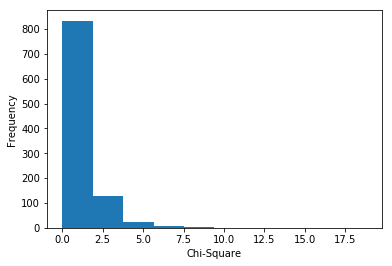

In [13]:
chi_squared_values = []

expected_male = 16280.5
expected_female = 16280.5

for ii in range(1000):
    #random between 0 and 1
    result = np.random.random(32561)
    obs_male = len(result[result<0.5]) 
    obs_female = len(result[result>=0.5]) 
    male_diff = (obs_male - expected_male)**2/expected_male
    female_diff = (obs_female - expected_female)**2/expected_female
    chi_squared_values.append(male_diff+female_diff)
    
plt.hist(chi_squared_values)
plt.xlabel("Chi-Square"), plt.ylabel("Frequency")
plt.show()

- The chi-squared value we calculated was 3728.95. The highest value in the chi-squared sampling distribution was about 12. This means that our chi-squared value is higher than 100% of all the values in the sampling distribution, so we get a p-value of 0. This means that there is a 0% chance that we could get such a result randomly.

<br>
<br>
<br>

# Third Study

Same as before but also including income: multi-category chi-square.

<img src="./img/gender_income_prop.png" align="left" style="width:350px;height:220px;">
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

- 20.5% of Males in the whole data set earn >50k in income.
- 33.1% of the whole dataset is Female
- 75.9% of the whole dataset earns <=50k.

We can use our total proportions to calculate expected values. 24.1% of people earn >50k, 33.1% of people are Female, so we expect .241 * .331 = .0799771 female that earn >50k to be (observed proportion is .036)

<br>

### Q1: Calculate Chi-Square

In [17]:
from scipy.stats import chisquare

males = 0.669
females = 0.331
over_50k =  0.241
under_50k = 0.759
total = 32561

males_over50k = males*over_50k*total
males_under50k = males*under_50k*total
females_over50k = females*over_50k*total
females_under50k = females*under_50k*total

observed = np.array([6662, 15128, 1179, 9592])
expected = np.array([males_over50k, males_under50k, females_over50k, females_under50k])
chisq_gender_income, p_value = chisquare(observed, expected)

print("Chi-Square: %0.2f, p_value: %0.2f" % (chisq_gender_income, p_value))

Chi-Square: 1517.60, p_value: 0.00


<br>

### Q2: Look and Gender + Race, multiple categories (crosstab to visualize, chi2_contingency to compute chi-squre)

- The crosstab function will print a table that shows frequency counts for two or more columns. 

In [18]:
import pandas as pd
income = pd.read_csv('./data/income.csv')

table = pd.crosstab(income["sex"],[income["race"]])
print(table)

race      Amer-Indian-Eskimo   Asian-Pac-Islander   Black   Other   White
sex                                                                      
 Female                  119                  346    1555     109    8642
 Male                    192                  693    1569     162   19174


- the scipy.stats.chi2_contingency takes in a cross table of observed counts, and returns the chi-squared value, the p-value, the degrees of freedom, and the expected frequencies. 

In [20]:
from scipy.stats import chi2_contingency

observed = pd.crosstab(income['sex'],[income['race']])

chisq_value_gender_race, pvalue_gender_race, df, expected = chi2_contingency(observed)

print("Chi-Square: %0.2f, p_value: %0.2f" % (chisq_value_gender_race, pvalue_gender_race))

print("\nExpect counts:") 
print(expected)

Chi-Square: 454.27, p_value: 0.00

Expect counts:
[[  102.87709223   343.69549461  1033.40204539    89.64531188
   9201.3800559 ]
 [  208.12290777   695.30450539  2090.59795461   181.35468812
  18614.6199441 ]]
